**1.Stock Prediction :**

Take stock price of any company you want and predicts its price by using LSTM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the data
df = pd.read_csv('/content/Reliance.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [3]:
df.dropna(axis = 0, inplace = True)

In [4]:
df.shape

(1232, 7)

In [5]:
# Select the 'Close' column as the target variable
target_col = 'Close'
df = df[[target_col]]

In [6]:
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [7]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df_scaled))
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

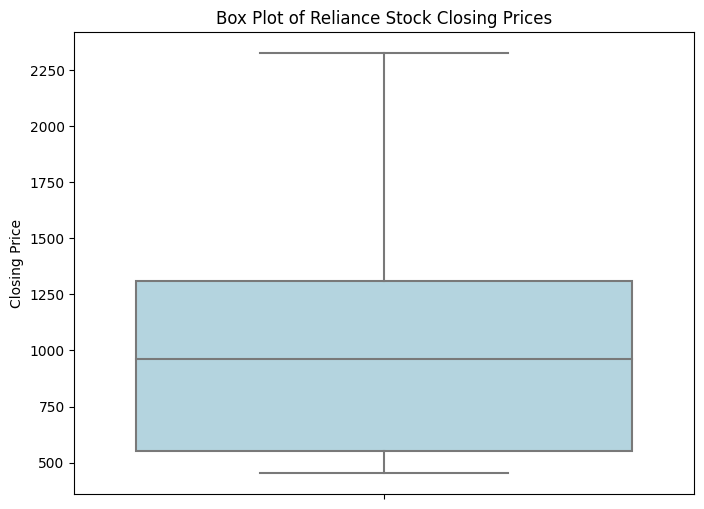

In [32]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Close'], color='lightblue')
plt.ylabel('Closing Price')
plt.title('Box Plot of Reliance Stock Closing Prices')
plt.show()

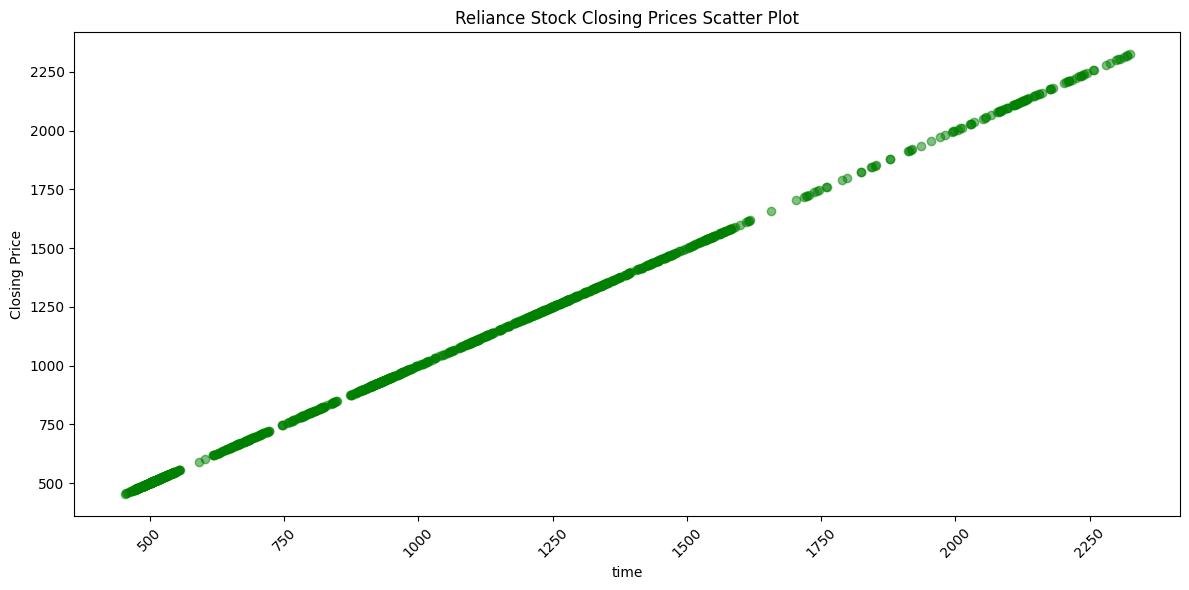

In [35]:
dates = df.iloc[:, 0]
closing_prices = df['Close']

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(dates, closing_prices, color='green', marker='o', alpha=0.5)
plt.xlabel('time')
plt.ylabel('Closing Price')
plt.title('Reliance Stock Closing Prices Scatter Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Create sequences for LSTM training
def create_sequences(df, seq_length):
    sequences = []
    for i in range(len(df) - seq_length):
        seq = df[i:i+seq_length]
        target = df[i+seq_length]
        sequences.append((seq, target))
    return sequences

seq_length = 10
train_sequences = create_sequences(train_data, seq_length)
test_sequences = create_sequences(test_data, seq_length)

In [9]:
# Convert sequences to numpy arrays
X_train = np.array([seq for seq, target in train_sequences])
y_train = np.array([target for seq, target in train_sequences])
X_test = np.array([seq for seq, target in test_sequences])
y_test = np.array([target for seq, target in test_sequences])

In [10]:
# Build the LSTM model
model = Sequential([ LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'), Dense(1)])

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
31/31 [==============================] - 5s 17ms/step - loss: 0.0353
Epoch 2/50
31/31 [==============================] - 1s 16ms/step - loss: 0.0023
Epoch 3/50
31/31 [==============================] - 1s 17ms/step - loss: 3.8013e-04
Epoch 4/50
31/31 [==============================] - 0s 12ms/step - loss: 2.8097e-04
Epoch 5/50
31/31 [==============================] - 0s 12ms/step - loss: 2.5093e-04
Epoch 6/50
31/31 [==============================] - 0s 14ms/step - loss: 2.3454e-04
Epoch 7/50
31/31 [==============================] - 1s 23ms/step - loss: 2.2211e-04
Epoch 8/50
31/31 [==============================] - 1s 33ms/step - loss: 2.1812e-04
Epoch 9/50
31/31 [==============================] - 1s 23ms/step - loss: 2.2607e-04
Epoch 10/50
31/31 [==============================] - 1s 23ms/step - loss: 2.2131e-04
Epoch 11/50
31/31 [==============================] - 1s 21ms/step - loss: 2.0471e-04
Epoch 12/50
31/31 [==============================] - 0s 12ms/step - loss: 2.1864e-

In [13]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 0.001820166828110814


In [14]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

8/8 [==============================] - 0s 3ms/step


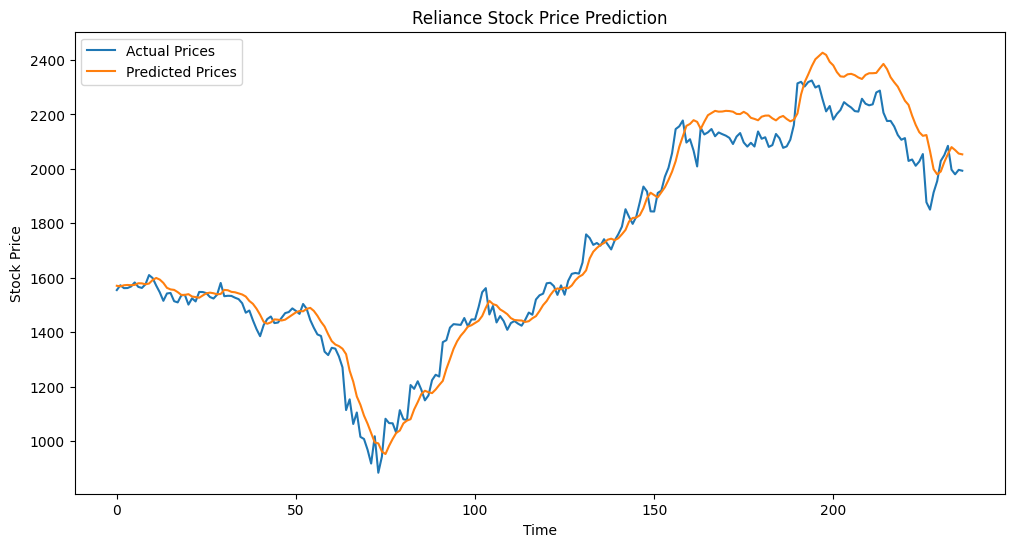

In [15]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()